# Fig 1 WTE UMAP and Analysis

This figure makes plots for the RPE projection.


### Initialization

In [1]:
# Import necessary packages
import os
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad
import csv
from datetime import datetime as dt

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Set verbosity and output package versions
sc.settings.verbosity = 2
sc.logging.print_header()

# Fonts for illustrator
import matplotlib.font_manager as fm

# Optional: confirm font file is in the right place
font_path = os.path.expanduser("/home/dalbao/.fonts/arial.ttf")
fm.fontManager.addfont(font_path)
arial_font = fm.FontProperties(fname=font_path)

# Editable text in PDF outputs
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.family'] = arial_font.get_name()

2025-12-10 17:29:52.207792: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


scanpy==1.9.6 anndata==0.10.3 umap==0.5.5 numpy==1.24.4 scipy==1.11.3 pandas==2.1.1 scikit-learn==1.1.3 statsmodels==0.14.0 igraph==0.11.3 louvain==0.8.1 pynndescent==0.5.11


Load datasets:

/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


['#1f77b4' '#ff7f0e' '#279e68' '#d62728' '#aa40fc' '#8c564b' '#e377c2'
 '#b5bd61' '#17becf' '#aec7e8' '#ffbb78' '#98df8a' '#ff9896' '#c5b0d5'
 '#c49c94']


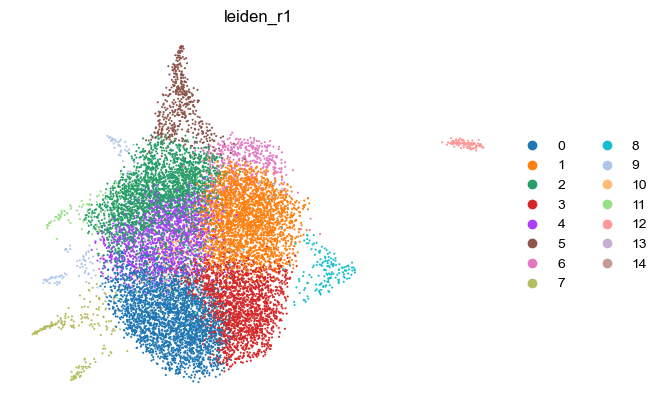

In [2]:
# Set location
os.chdir("/home/dalbao/2023-012-Runx3mutD8scRNA/AlbaoRunx3Manuscript/figures/01")

# Read in the data
adata = ad.read_h5ad("../../h5ad/03_clustering_WTE.h5ad")

# Check object
adata

# Plot umap with leiden_r1 clustering
sc.pl.umap(adata, color=["leiden_r1"], frameon=False, show=False)

# Colors
print(adata.uns['leiden_r1_colors'])

# Write CSV file of obsDf
adata.obs.to_csv("../../csv/03_obsDf_clustering_WTE.csv")

## Figure UMAP

/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


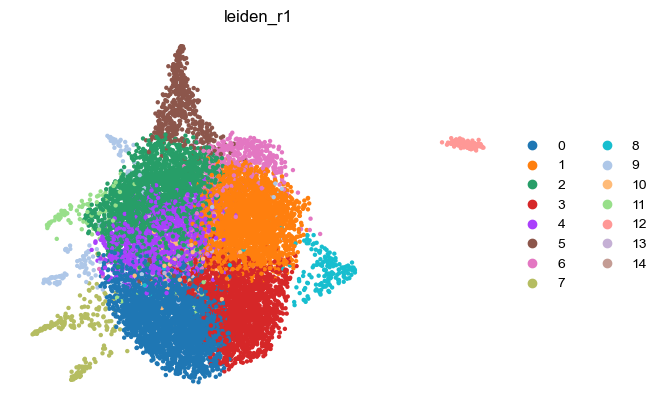

In [3]:
# Plot to PDF
sc.pl.umap(adata, color = 'leiden_r1', frameon = False, size = 40, save = "_EFig2E.pdf")

In [4]:
def plot_highlight_group(adata, group_name, highlight_color, outfile_tag):
    """
    Highlight a single group in adata.obs['group'] on UMAP.
    Ensures highlighted cells are plotted on top.
    """
    # Temporary AnnData used only for plotting
    ad = adata.copy()

    highlight_col = f"highlight_{group_name}"

    # Assign highlight vs other
    ad.obs[highlight_col] = np.where(
        ad.obs["group"] == group_name,
        group_name,
        "Other"
    )

    # Explicitly define category order: Other (bg) first, highlighted second
    ad.obs[highlight_col] = pd.Categorical(
        ad.obs[highlight_col],
        categories=["Other", group_name],
        ordered=True
    )

    # Reorder obs so "Other" rows are drawn first, highlighted last
    ad = ad[ad.obs[highlight_col].cat.codes.argsort()].copy()

    # Colors
    palette = {
        "Other": "lightgrey",
        group_name: highlight_color,
    }

    sc.pl.umap(
        ad,
        color=highlight_col,
        frameon=False,
        size=40,
        palette=palette,
        show=False,
        save=f"_{outfile_tag}.pdf"
    )



# 1) TE
plot_highlight_group(
    adata, group_name="TE",
    highlight_color="#F93535",
    outfile_tag="EFig2E_TE"
)

plot_highlight_group(
    adata, group_name="EE",
    highlight_color="#FCAF38",
    outfile_tag="EFig2E_EE"
)

plot_highlight_group(
    adata, group_name="MP",
    highlight_color="#50A3A4",
    outfile_tag="EFig2E_MP"
)

plot_highlight_group(
    adata, group_name="DP",
    highlight_color="#674A40",
    outfile_tag="EFig2E_DP"
)


/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


## Subset Relevant Clusters

In [5]:
# Create a new object adata_sub.obs which only contains the leiden_r1 groups
# '0', '1', '2', '3', '4', '5', '6'
adata_sub = adata[adata.obs['leiden_r1'].isin(['0', '1', '2', '3', '4', '5', '6'])].copy()

# add the prefix WTE to the leiden_r1 groups
adata_sub.obs['leiden_r1'] = 'WTE' + adata_sub.obs['leiden_r1'].astype(str)

# Reconvert into cateogories
adata_sub.obs['leiden_r1'] = adata_sub.obs['leiden_r1'].astype('category')

In [ ]:
# Reorder the categories into the desired order
adata_sub.obs['leiden_r1'] = adata_sub.obs['leiden_r1'].cat.reorder_categories(
    ['WTE0', 'WTE3', 'WTE2', 'WTE1', 'WTE4', 'WTE5', 'WTE6'], ordered=True
)

adata_sub.uns['leiden_r1_colors'] = ['#1f77b4', '#d62728' '#279e68', '#ff7f0e', '#aa40fc', '#8c564b', '#e377c2']

## DotPlots Stem Genes

/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


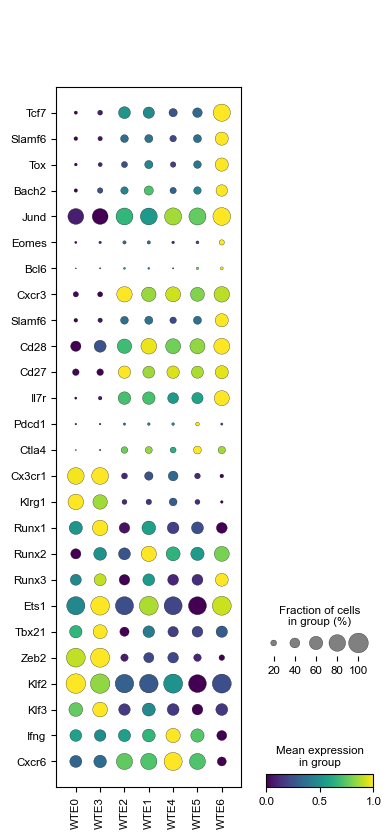

In [7]:
genes = [   'Tcf7',
            'Slamf6',
            'Tox',
            'Bach2',
            'Jund',
            'Eomes',
            'Bcl6',
            'Cxcr3',
            'Slamf6',
            'Cd28',
            'Cd27',
            'Il7r',
            'Pdcd1',
            'Ctla4',
            'Cx3cr1',
            'Klrg1',
            'Runx1',
            'Runx2',
            'Runx3',
            'Ets1',
            'Tbx21',
            'Zeb2',
            'Klf2',
            'Klf3',
            'Ifng',
            'Cxcr6']
# sc.pl.dotplot(adata_sub, genes, groupby='leiden_r1', swap_axes=True, cmap="viridis", save="stem_RPE_dotplot.pdf")
sc.pl.dotplot(adata_sub, genes, groupby='leiden_r1', swap_axes=True, cmap="viridis", standard_scale='var', save = "Fig1H.pdf")

## Signature Correlations

In [ ]:
# Load CSV
df = pd.read_csv("../../signatures/genesets_v11_Ensembl98.csv")

# Keep gs_name containing Albao or GSE68056
mask_include = df["gs_name"].str.contains(r"Albao|GSE68056", na=False)

# Throw away (exclude) gs_name values that END with "KO"
# r"KO$" matches KO at the end of the string
mask_exclude = df["gs_name"].str.contains(r"KO$", na=False)

# Combine: include AND NOT exclude
mask = mask_include & ~mask_exclude

df_sub = df[mask].copy()

print(f"Filtered rows: {df_sub.shape[0]}")
print(df_sub["gs_name"].unique())

Filtered rows: 1077
['Exp391_CD8---GSE68056_WT_vs_Blimp1KO---WT'
 'Exp391_CD8---GSE68056_WT_vs_Il2raKO---WT'
 'Exp391_CD8---GSE68056_WT_vs_Tbx21KO---WT' 'Albao_Runx3KD'
 'Albao_Runx3OE' 'Albao_Runx3KD_Down' 'Albao_Runx3OE_Down']


In [ ]:
# Replace the substring in gs_name
df_sub["gs_name"] = df_sub["gs_name"].str.replace(
    "Exp391_CD8---GSE68056_WT_vs_",
    "",
    regex=False    # literal string replacement, safer here
)

# Replace the substring in gs_name
df_sub["gs_name"] = df_sub["gs_name"].str.replace(
    "KO---WT",
    "",
    regex=False    # literal string replacement, safer here
)

# Replace the substring in gs_name
df_sub["gs_name"] = df_sub["gs_name"].str.replace(
    "Blimp1",
    "Prdm1",
    regex=False    # literal string replacement, safer here
)

# Inspect unique names after replacement
df_sub["gs_name"].unique()

array(['Prdm1', 'Il2ra', 'Tbx21', 'Albao_Runx3KD', 'Albao_Runx3OE',
       'Albao_Runx3KD_Down', 'Albao_Runx3OE_Down'], dtype=object)

In [10]:
# Use the score_genes function to score the gene signatures for each unique gs_name in the gene_sigs dataframe
for gs_name in df_sub['gs_name'].unique():
    # Get the gene symbols for the current gs_name
    genes = df_sub[df_sub['gs_name'] == gs_name]['gene_symbol'].tolist()
    
    # Score the genes in adata_sub
    sc.tl.score_genes(adata_sub, gene_list=genes, score_name=gs_name)

computing score 'Prdm1'
    finished (0:00:00)
computing score 'Il2ra'
    finished (0:00:00)
computing score 'Tbx21'
    finished (0:00:00)
computing score 'Albao_Runx3KD'
    finished (0:00:00)
computing score 'Albao_Runx3OE'
    finished (0:00:00)
computing score 'Albao_Runx3KD_Down'
    finished (0:00:00)
computing score 'Albao_Runx3OE_Down'
    finished (0:00:00)


In [11]:
# Write CSV file of obsDf
adata_sub.obs.to_csv("../../csv/03_obsDf_clustering_WTE_sub.csv")

In [ ]:
adata.uns['leiden_r1_colors']

array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a',
       '#ff9896', '#c5b0d5', '#c49c94'], dtype=object)

## Subset Relevant Clusters

In [13]:
# Create a new object adata_sub.obs which only contains the leiden_r1 groups
# '0', '1', '2', '3', '4', '5', '6'
adata_sub = adata[adata.obs['leiden_r1'].isin(['0', '1', '2', '3', '4', '5', '6', '12'])].copy()

# add the prefix WTE to the leiden_r1 groups
adata_sub.obs['leiden_r1'] = 'WTE' + adata_sub.obs['leiden_r1'].astype(str)

# Reconvert into cateogories
adata_sub.obs['leiden_r1'] = adata_sub.obs['leiden_r1'].astype('category')

In [14]:
# Reorder the categories into the desired order
adata_sub.obs['leiden_r1'] = adata_sub.obs['leiden_r1'].cat.reorder_categories(
    ['WTE0', 'WTE3', 'WTE2', 'WTE1', 'WTE4', 'WTE5', 'WTE6', 'WTE12'], ordered=True
)

adata_sub.uns['leiden_r1_colors'] = ['#279e68', '#aa40fc', '#1f77b4', '#ff7f0e', '#d62728', '#8c564b', '#b5bd61', '#ff9896']

## DotPlots Effector Genes

/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


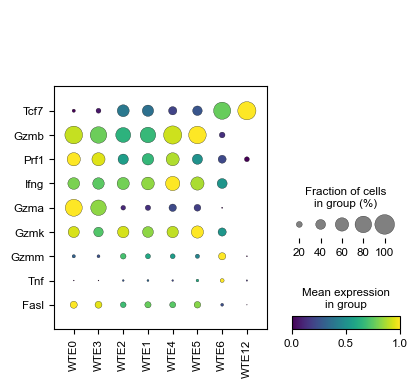

In [15]:
genes = ['Tcf7', 'Gzmb', 'Prf1', 'Ifng', 'Gzma', 'Gzmk', 'Gzmm', 'Tnf', 'Fasl']
# sc.pl.dotplot(adata_sub, genes, groupby='leiden_r1', swap_axes=True, cmap="viridis", save="stem_RPE_dotplot.pdf")
sc.pl.dotplot(adata_sub, genes, groupby='leiden_r1', swap_axes=True, cmap="viridis", standard_scale='var', save = "EFig3A_WTE.pdf")